In [ ]:
# Cài kaggle
!pip install -q kaggle
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
# Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
import tensorflow as tf
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

In [ ]:
# tạo file kaggle.json
!touch kaggle.json
!echo '{"username":"lasion","key":"241a4d93286f792dff44b5da573987ad"}' > kaggle.json

In [ ]:
# đăng nhập kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                             DAIGT V2 Train Dataset                          29MB  2023-11-16 01:38:36           2378        219  1.0              
manjitbaishya001/la-crime-data-2010-to-2023                 Los Angeles Crime Data - 2010 to 2023          147MB  2023-12-19 13:20:31            812         24  1.0              
manjitbaishya001/house-prices-2023                          Pakistan House Prices - 2023                     1MB  2023-12-15 18:57:24            823         22  1.0              
muhammadbinimran/housing-price-prediction-data              Housing Price Prediction Data                

In [ ]:
!kaggle datasets download -d catherinehorng/dogbreedidfromcomp

 99% 685M/691M [00:10<00:00, 57.9MB/s]
100% 691M/691M [00:10<00:00, 70.8MB/s]


In [ ]:
!unzip /content/dogbreedidfromcomp.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: tr

In [ ]:
# Read the labels.csv file and check shape and records
labels_all = pd.read_csv('labels.csv')
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Loading number or each breed
breed_all = labels_all['breed']
breed_count = breed_all.value_counts()
print(breed_count.shape)
breed_count.head()

(120,)


scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [ ]:
labels_all.reset_index()

,index,id,breed
0,0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,2,001cdf01b096e06d78e9e5112d419397,pekinese
3,3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...,...
10217,10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [ ]:
# Selecting all breeds because i have high computation power
CLASS_NAME = breed_all.unique()[:20]
labels = labels_all[(labels_all['breed'].isin(CLASS_NAME))]
labels = labels.reset_index()
print(CLASS_NAME.shape)
labels.head()

(20,)


,index,id,breed
0,0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,2,001cdf01b096e06d78e9e5112d419397,pekinese
3,3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 299, 299, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAME)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    # Thay đổi kích thước tất cả ảnh về 299x299
    img = image.load_img('train/%s.jpg' % labels['id'][i], target_size=(299, 299))
    # Chuyển ảnh thành array
    img = image.img_to_array(img)
    # Mở rộng chiều ảnh để phù hợp đầu vào model: (224, 224, 3) -> (1, 224, 224, 3)
    # x = np.expand_dims(img.copy(), axis=0)
    # Chuẩn hóa ảnh
    # X_data[i] = img / 255.0
    X_data[i] = img

# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 1696/1696 [00:04<00:00, 369.42it/s]


Train Images shape:  (1696, 299, 299, 3)  size: 454,872,288
One-hot encoded output shape:  (1696, 20)  size: 33,920


In [ ]:
# Building the Model
def CNN():
  model = Sequential()

  model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
  model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
  model.add(Dense(len(CLASS_NAME), activation = "softmax"))

  model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

  model.summary()
  return model

In [ ]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [ ]:
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32

# Create train generator
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, # only use rescale=1./255 if training from scratch
                                  rotation_range = 30,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  horizontal_flip = True) # CHECK

train_generator = train_datagen.flow(X_train, Y_train,
                                     shuffle = False, batch_size = batch_size, seed = 1)

# Create validation generator
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # do not augment validation data

val_generator = val_datagen.flow(X_val, Y_val,
                                shuffle = False, batch_size = batch_size, seed = 1)

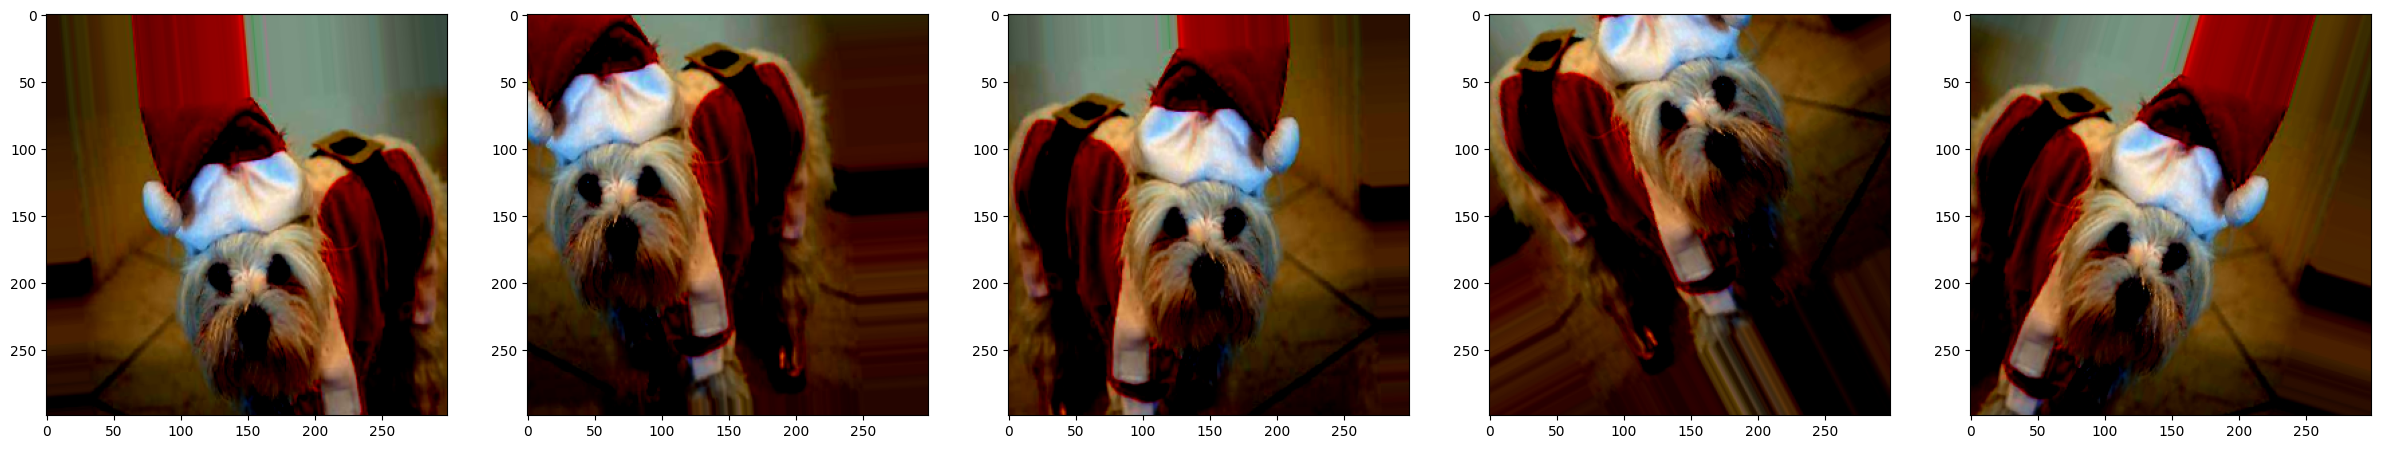

In [ ]:
img_id = 16

dog_generator = train_datagen.flow(X_train[img_id:img_id+1], Y_train[img_id:img_id+1],
                                     shuffle = False, batch_size = batch_size, seed = 1)

plt.figure(figsize=(30,20))
dogs = [next(dog_generator) for i in range(0,5)]
for counter, dog in enumerate(dogs):
    plt.subplot(1, 5, counter+1)
    plt.imshow(dog[0][0])
    #plt.axis('off')

plt.show()

In [ ]:
# Build Model Using Pre-trained Model

from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

# load InceptionV3 pre-trained model
base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (299,299,3))

model = models.Sequential()
model.add(base_model) # add pre_trained layers
model.add(GlobalAveragePooling2D())
#model.add(Flatten()) # flatten to 1-D vector to prepare for fully connected layers
model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(len(CLASS_NAME), activation = 'softmax'))


# Freeze pre-trained layers
print('Number of trainable weights before freezing the base layer:', len(model.trainable_weights))
model.layers[0].trainable = False
print('Number of trainable weights after freezing the base layer:', len(model.trainable_weights))

87910968/87910968 [==============================] - 1s 0us/step
Number of trainable weights before freezing the base layer: 194
Number of trainable weights after freezing the base layer: 6


In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 20)                10260     
                                                        

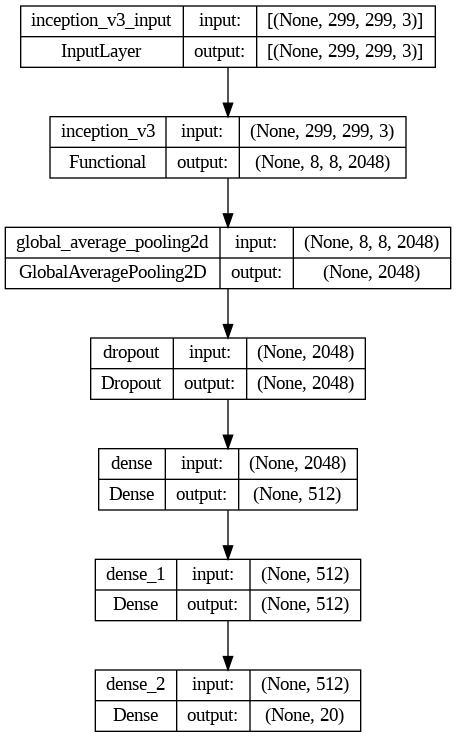

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
epochs = 20 # 1 epoch là 1 lần train sử dụng hết bộ dữ liệu
batch_size = 32 # Số ảnh đưa vào mỗi lần tính toán
                 # VD: batch_size = 128 là mỗi 1 lần đưa vào 128 ảnh để tính, tính xong sẽ trả lại và lấy 128 ảnh tiếp theo
                 # Batch_size nhỏ => tiết kiệm RAM

checkpoint_filepath = './checkpoints/my_checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model.fit(train_generator,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = val_generator,
                    callbacks=[model_checkpoint_callback])

Epoch 1/20
39/39 [==============================] - 52s 872ms/step - loss: 2.4272 - accuracy: 0.4443 - val_loss: 1.5207 - val_accuracy: 0.8954
Epoch 2/20
39/39 [==============================] - 29s 734ms/step - loss: 0.9928 - accuracy: 0.9057 - val_loss: 0.3907 - val_accuracy: 0.9379
Epoch 3/20
39/39 [==============================] - 29s 743ms/step - loss: 0.3560 - accuracy: 0.9303 - val_loss: 0.2129 - val_accuracy: 0.9444
Epoch 4/20
39/39 [==============================] - 33s 852ms/step - loss: 0.2365 - accuracy: 0.9500 - val_loss: 0.1743 - val_accuracy: 0.9412
Epoch 5/20
39/39 [==============================] - 28s 738ms/step - loss: 0.1810 - accuracy: 0.9557 - val_loss: 0.1746 - val_accuracy: 0.9412
Epoch 6/20
39/39 [==============================] - 28s 723ms/step - loss: 0.1675 - accuracy: 0.9557 - val_loss: 0.1563 - val_accuracy: 0.9444
Epoch 7/20
39/39 [==============================] - 28s 718ms/step - loss: 0.1409 - accuracy: 0.9590 - val_loss: 0.1655 - val_accuracy: 0.9379

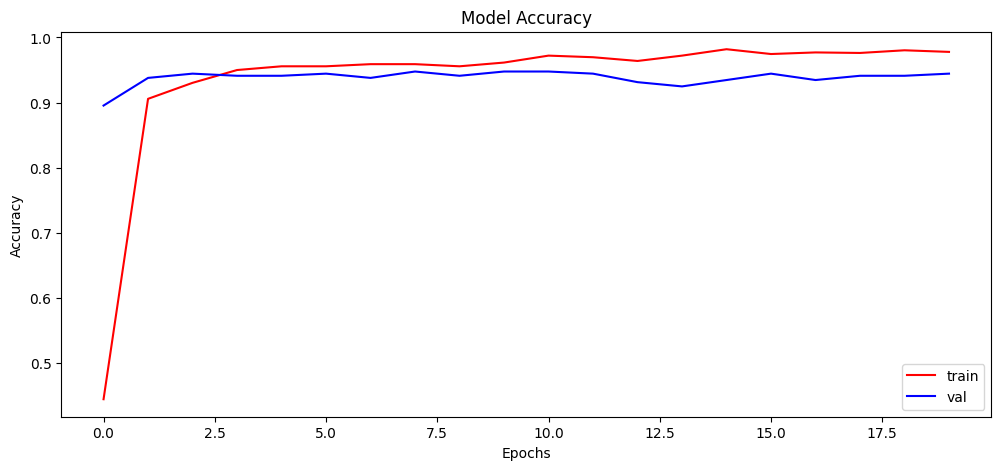

In [ ]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

In [ ]:
# Create test generator
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # do not augment test data

test_generator = test_datagen.flow(X_test, Y_test,
                                shuffle = False, batch_size = batch_size, seed = 1)

In [ ]:
# Y_pred = model.predict(X_test)
score = model.evaluate(test_generator)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')
# print(np.argmax(Y_pred[0]))

6/6 [==============================] - 3s 588ms/step - loss: 0.1055 - accuracy: 0.9765
Accuracy over the test set: 
  97.65 %


1/1 [==============================] - 4s 4s/step


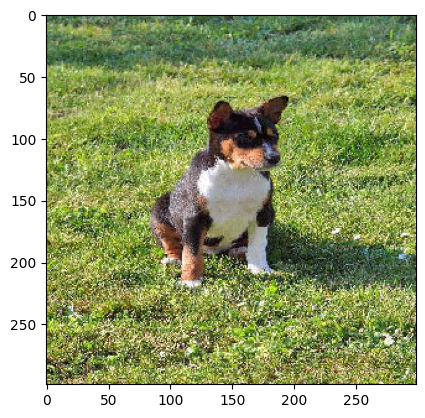

Originally :  basenji
Predicted :  basenji
Confidence : 0.86947954


In [ ]:
import random

index = random.randint(0, len(X_test) - 1)

x_sample = X_test[index]
y_sample = Y_test[index]

y_pred = model.predict(test_datagen.flow(np.expand_dims(x_sample, axis=0), np.expand_dims(y_sample, axis=0)))

# Plotting image to compare
plt.imshow(x_sample/255)
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ", CLASS_NAME[np.argmax(y_sample)])
print("Predicted : ", CLASS_NAME[np.argmax(y_pred)])
print("Confidence :", np.max(y_pred))

In [ ]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

Kiểm thử chương trình